## BERTScore Tutorial

In [1]:
# install pytorch and huggingface transformers if you havn't done so
!pip install torch==1.5.1
!pip install transformers==4.0.1
!pip install bert_score==0.3.11

We will first demonstrate how to use the `score` function in `bert_score`, which is what you need to evaluate a set of machine generated outputs.

In [3]:
from bert_score import score

In [5]:
# cloning the repo because we need to get some example data
!git clone https://github.com/Tiiiger/bert_score.git

fatal: destination path 'bert_score' already exists and is not an empty directory.


Inputs to `score` are a list of candidate sentences and a list of reference sentences. 

In [57]:
from os import truncate
cand_paths=["news-commentary-v13.cs","news-commentary-v13.de","news-commentary-v13.ru","news-commentary-v13.zh"]
max_index=5000

refs = []
with open("news-commentary-v13.en") as f:
  for index,value in enumerate(f):
    if index<max_index:
      refs.append(value.strip())

models=["xlm-mlm-100-1280","xlm-mlm-en-2048"]
results=[]
for model in models:
  lans=[]
  Ps=[]
  Rs=[]
  F1s=[]
  for path in cand_paths:
    
    cands = []
    with open(path) as f:
      for index,value in enumerate(f):
        if index<max_index:
          cands.append(value.strip())

    # When you are running this cell for the first time, 
    # it will download the BERT model which will take relatively longer. 
    # ,truncation=True
    P, R, F1 = score(cands, refs, lang="en", verbose=True, model_type=model,use_fast_tokenizer=True,batch_size=32)

    lans.append(path[-2:])
    Ps.append(P)
    Rs.append(R)
    F1s.append(F1)

  results.append(model)
  results.append(lans)
  results.append(Ps)
  results.append(Rs)
  results.append(F1s)

  print(model)
  for i in range(len(lans)):
    print(lans[i],": P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}")





calculating scores...
computing bert embedding.


  0%|          | 0/313 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 298.13 seconds, 16.77 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/313 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 335.34 seconds, 14.91 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/312 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 292.28 seconds, 17.11 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/313 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 371.83 seconds, 13.45 sentences/sec
xlm-mlm-100-1280
cs : P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}
de : P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}
ru : P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}
zh : P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}
calculating scores...
computing bert embedding.


  0%|          | 0/313 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 485.72 seconds, 10.29 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/313 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 514.44 seconds, 9.72 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/312 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 1087.15 seconds, 4.60 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/313 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 453.73 seconds, 11.02 sentences/sec
xlm-mlm-en-2048
cs : P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}
de : P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}
ru : P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}
zh : P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}


Let's have a look.

In [60]:
# len(cands)
# len(refs)

model=results[0]
lans=results[1]
Ps=results[2]
Rs=results[3]
F1s=results[4]

print(model)
for i in range(len(lans)):
  print(lans[i])
  print(f": P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}")

model=results[5]
lans=results[6]
Ps=results[7]
Rs=results[8]
F1s=results[9]

print(model)
for i in range(len(lans)):
  print(lans[i])
  print(f": P={Ps[i].mean():.3f}, R={Rs[i].mean():.3f}, F1={F1s[i].mean():.3f}")

xlm-mlm-100-1280
cs
: P=0.419, R=0.432, F1=0.424
de
: P=0.426, R=0.438, F1=0.431
ru
: P=0.431, R=0.438, F1=0.433
zh
: P=0.405, R=0.423, F1=0.413
xlm-mlm-en-2048
cs
: P=0.770, R=0.807, F1=0.788
de
: P=0.766, R=0.804, F1=0.785
ru
: P=0.752, R=0.753, F1=0.752
zh
: P=0.806, R=0.774, F1=0.789


We are now ready to call the score function. Besides candidates and references, we need to speicify the bert model we are using. Since we are dealing with English sentences, we will use the default English model, which is *roberta-large* model.

The outputs of the `score` function are Tensors of precision, recall, and F1 respectively. Each Tensor has the same number of items with the candidate and reference lists. Each item in the list is a scalar, representing the score for the corresponding candidates and references.

We can take the average of all candidate reference pairs to be the system level score.

It might also be very interestig to see the distribution of BERTScore.

In [2]:
import matplotlib.pyplot as plt

In [ ]:
# plot histogram for example
F1s=results[4]

plt.hist(lans, bins=20)
plt.show()


`bert_score` also provides a convenient function `plot_example` to support sentence-level visualization by plotting th e pairwise cosine similarity. Note that here we have not applied the idf weighting.

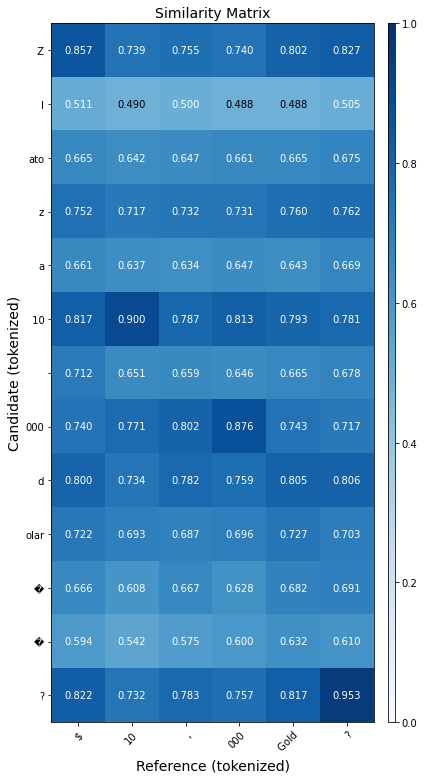

In [53]:
# plot pairwise cosine similarity for example
from bert_score import plot_example

# cand = cands[0]
# ref = refs[0]
# plot_example(cand, ref, lang="en")